# EDA for reccomendation system (Modify markdown)



## Summary of notebook:

EDA was conducted on course_genres dataframe and the course ratings dataframe.

The course counts of each genre were plotted in a **barchart** to see the distribution and check if a course is under/over-represented.

A **histogram** was produced to obtain the number of users and their general ratings count, this also allowed to check for skew.

A **dataframe** was also produced to check the **top 20 courses** (according to enrollments), another dataframe was then added which then showed the enrollments as a percentage of the total enrollments. The mean percentage of enrollments and mean number of enrollments was also noted.

A **Word cloud** was also produced to see the most common words in the dataframe, **stop words** was used to filter out common english words.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#Csvs for the projects
course_genre_df = pd.read_csv('course_genre.csv')
course_ratings_df = pd.read_csv('course_ratings.csv')

In [8]:
course_genre_df.head()
course_genre_df.shape

(307, 16)

In [12]:
course_ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


In [13]:
course_ratings_df.shape

(233306, 3)

In [67]:
# Get course counts per genre #TODO: add why?
genre_counts = course_genre_df.iloc[:, 1:].apply(lambda x: x.sum(), axis=0)
genre_counts[1:]

Database           60
Python             28
CloudComputing     37
DataAnalysis       56
Containers         17
MachineLearning    69
ComputerVision     10
DataScience        38
BigData            36
Chatbot             4
R                  17
BackendDev         78
FrontendDev        19
Blockchain          4
dtype: object

In [69]:
# Convert the values in the genre_counts series to integers
genre_counts = genre_counts[1:]
genre_counts = genre_counts.apply(int)

In [71]:
# Sort the genre counts in descending order
sorted_genre_counts = genre_counts.sort_values(ascending=False)
sorted_genre_counts

BackendDev         78
MachineLearning    69
Database           60
DataAnalysis       56
DataScience        38
CloudComputing     37
BigData            36
Python             28
FrontendDev        19
Containers         17
R                  17
ComputerVision     10
Chatbot             4
Blockchain          4
dtype: int64

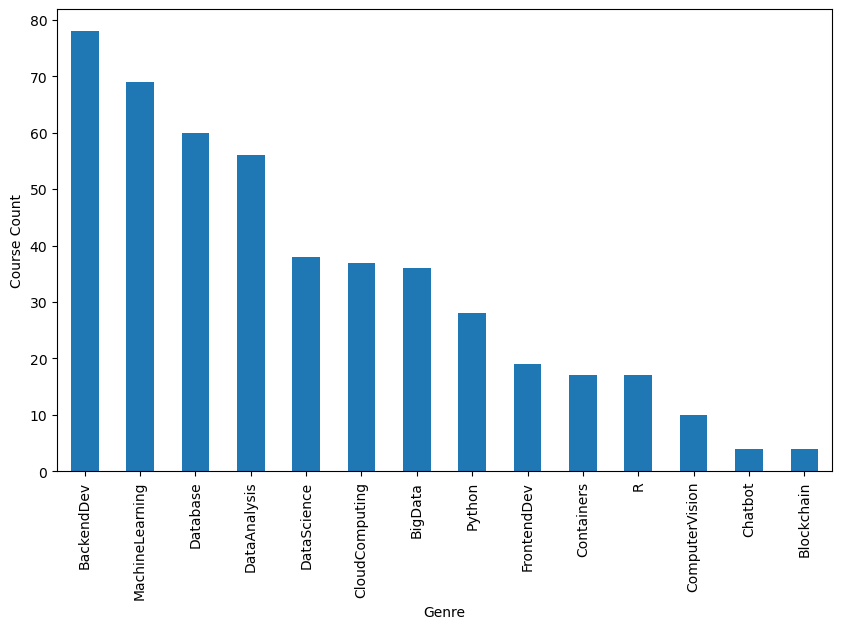

In [73]:
# Plot the sorted genre counts as a bar chart
plt.figure(figsize=(10, 6))

#TODO: Add a comment here
sorted_genre_counts.plot(kind='bar')

# Set the x-axis label
plt.xlabel('Genre')

# Set the y-axis label
plt.ylabel('Course Count')

# Show the plot
plt.show()

In [80]:
# Group the ratings dataframe by the user column and get the size of each group
rating_counts = course_ratings_df.groupby('user').size()

# Get the total number of users after aggregation
num_users = rating_counts.size

# Print the total number of users
print(f'Total number of users: {num_users}')

# Describe ratings counts
rating_counts.describe()

Total number of users: 33901


count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64

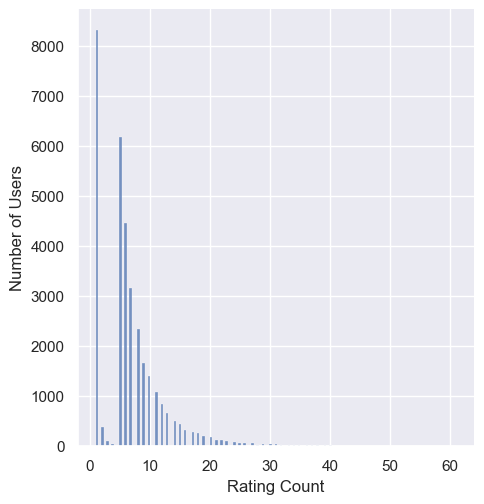

In [84]:
#TODO: write what is being set here
# Set the figure size
sns.set(rc={'figure.figsize':(10,6)})

# Plot the histogram of rating counts with separated bars
sns.displot(rating_counts, kde=False, bins='auto')

# Set the x-axis label
plt.xlabel('Rating Count')

# Set the y-axis label
plt.ylabel('Number of Users')

# Show the plot
plt.show()

In [78]:
# #Find the Top-20 Most Popular Courses #TODO: WHY? and merge the two cells and refactor and simplyify them

# # Group the ratings dataframe by the item column and get the size of each group
# enrollment_counts = course_ratings_df.groupby('item').size()

# # Sort the enrollment counts in descending order
# sorted_enrollment_counts = enrollment_counts.sort_values(ascending=False)

# # Get the top 20 courses
# top_20_courses = sorted_enrollment_counts[:20]

# #Use Pandas merge() method to join the course_df (contains the course title column).
# # Convert the top_20_courses series into a dataframe
# top_20_courses_df = top_20_courses.reset_index()

# # Rename the columns of the top_20_courses_df dataframe
# top_20_courses_df.columns = ['item', 'enrollments']

# # Rename the COURSE_ID column to item
# course_genre_df = course_genre_df.rename(columns={'COURSE_ID': 'item'})

# # Merge the course_df and top_20_courses_df dataframes on the item column
# merged_df = pd.merge(course_genre_df, top_20_courses_df, on='item')

# #TODO: Are the following lines below needed?

# # # Print the merged dataframe
# # merged_df.head()

# # merged_df.loc[:, ['TITLE','enrollments']].sort_values(by=['enrollments'], ascending=False).reset_index(drop = True)

,item,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain,enrollments
0,BC0101EN,blockchain essentials,0,0,0,0,0,0,0,0,0,0,0,1,0,1,6719
1,BD0115EN,mapreduce and yarn,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3670
2,BD0211EN,spark fundamentals i,1,0,0,1,0,0,0,0,1,0,0,0,0,0,7551
3,ST0101EN,statistics 101,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5015
4,DS0105EN,data science hands on with open source tools,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7199


In [99]:
# #TODO: This should be in the cell above
# merged_df.loc[:, ['TITLE','enrollments']].sort_values(by=['enrollments'], ascending=False).reset_index(drop = True)

,TITLE,enrollments
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


In [ ]:
#TODO: RUN THIS CODE


# Group the ratings dataframe by the item column and get the size of each group
enrollment_counts = course_ratings_df.groupby('item').size()

# Sort the enrollment counts in descending order and get the top 20 courses
top_20_courses = enrollment_counts.sort_values(ascending=False)[:20]

# Merge the course_df and top_20_courses dataframes on the item column and rename columns
merged_df = (
    pd.merge(course_genre_df.rename(columns={'COURSE_ID': 'item'}), 
             top_20_courses.reset_index().rename(columns={'item': 'item', 0: 'enrollments'}), 
             on='item')
    .loc[:, ['TITLE', 'enrollments']]
    .sort_values(by=['enrollments'], ascending=False)
    .reset_index(drop=True)
)

In [101]:
# #Print total enrollments? #TODO: why? -> could this be in a different place?
# print(f"The total course enrollments is {course_ratings_df.shape[0]}")

The total course enrollments is 233306


In [111]:
#TODO: If previous code works, use it to redo this cell
# Top 20 Percentage enrollments #TODO:(check grammar)
merged_df['percentage'] = merged_df['enrollments'].apply(lambda x: x / merged_df['enrollments'].sum() * 100)
filtered_df = merged_df.loc[:, ['TITLE', 'enrollments', 'percentage']]
filtered_df['percentage (2 d.p)'] = filtered_df['percentage'].round(2)
filtered_df.loc[:, ['TITLE', 'enrollments', 'percentage (2 d.p)']]

,TITLE,enrollments,percentage (2 d.p)
0,blockchain essentials,6719,4.55
1,mapreduce and yarn,3670,2.48
2,spark fundamentals i,7551,5.11
3,statistics 101,5015,3.40
4,data science hands on with open source tools,7199,4.87
5,data science methodology,7719,5.23
6,deep learning 101,6323,4.28
7,big data 101,13291,9.00
8,docker essentials a developer introduction,4480,3.03
9,build your own chatbot,5512,3.73


In [113]:
#TODO: Add why?
print(f"The percentage of enrollments of each course is {filtered_df['percentage'].mean()}")
print(f"The mean of enrollments of each course is {filtered_df['enrollments'].mean()}")

The percentage of enrollments of each course is 5.0
The mean of enrollments of each course is 7384.4


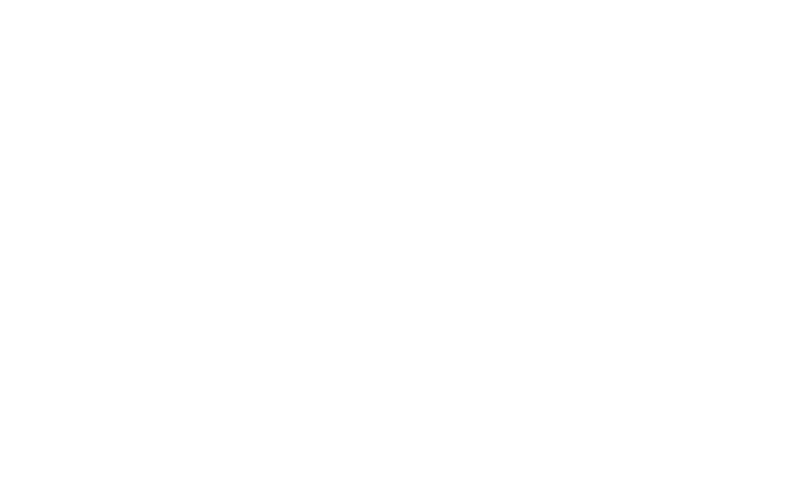

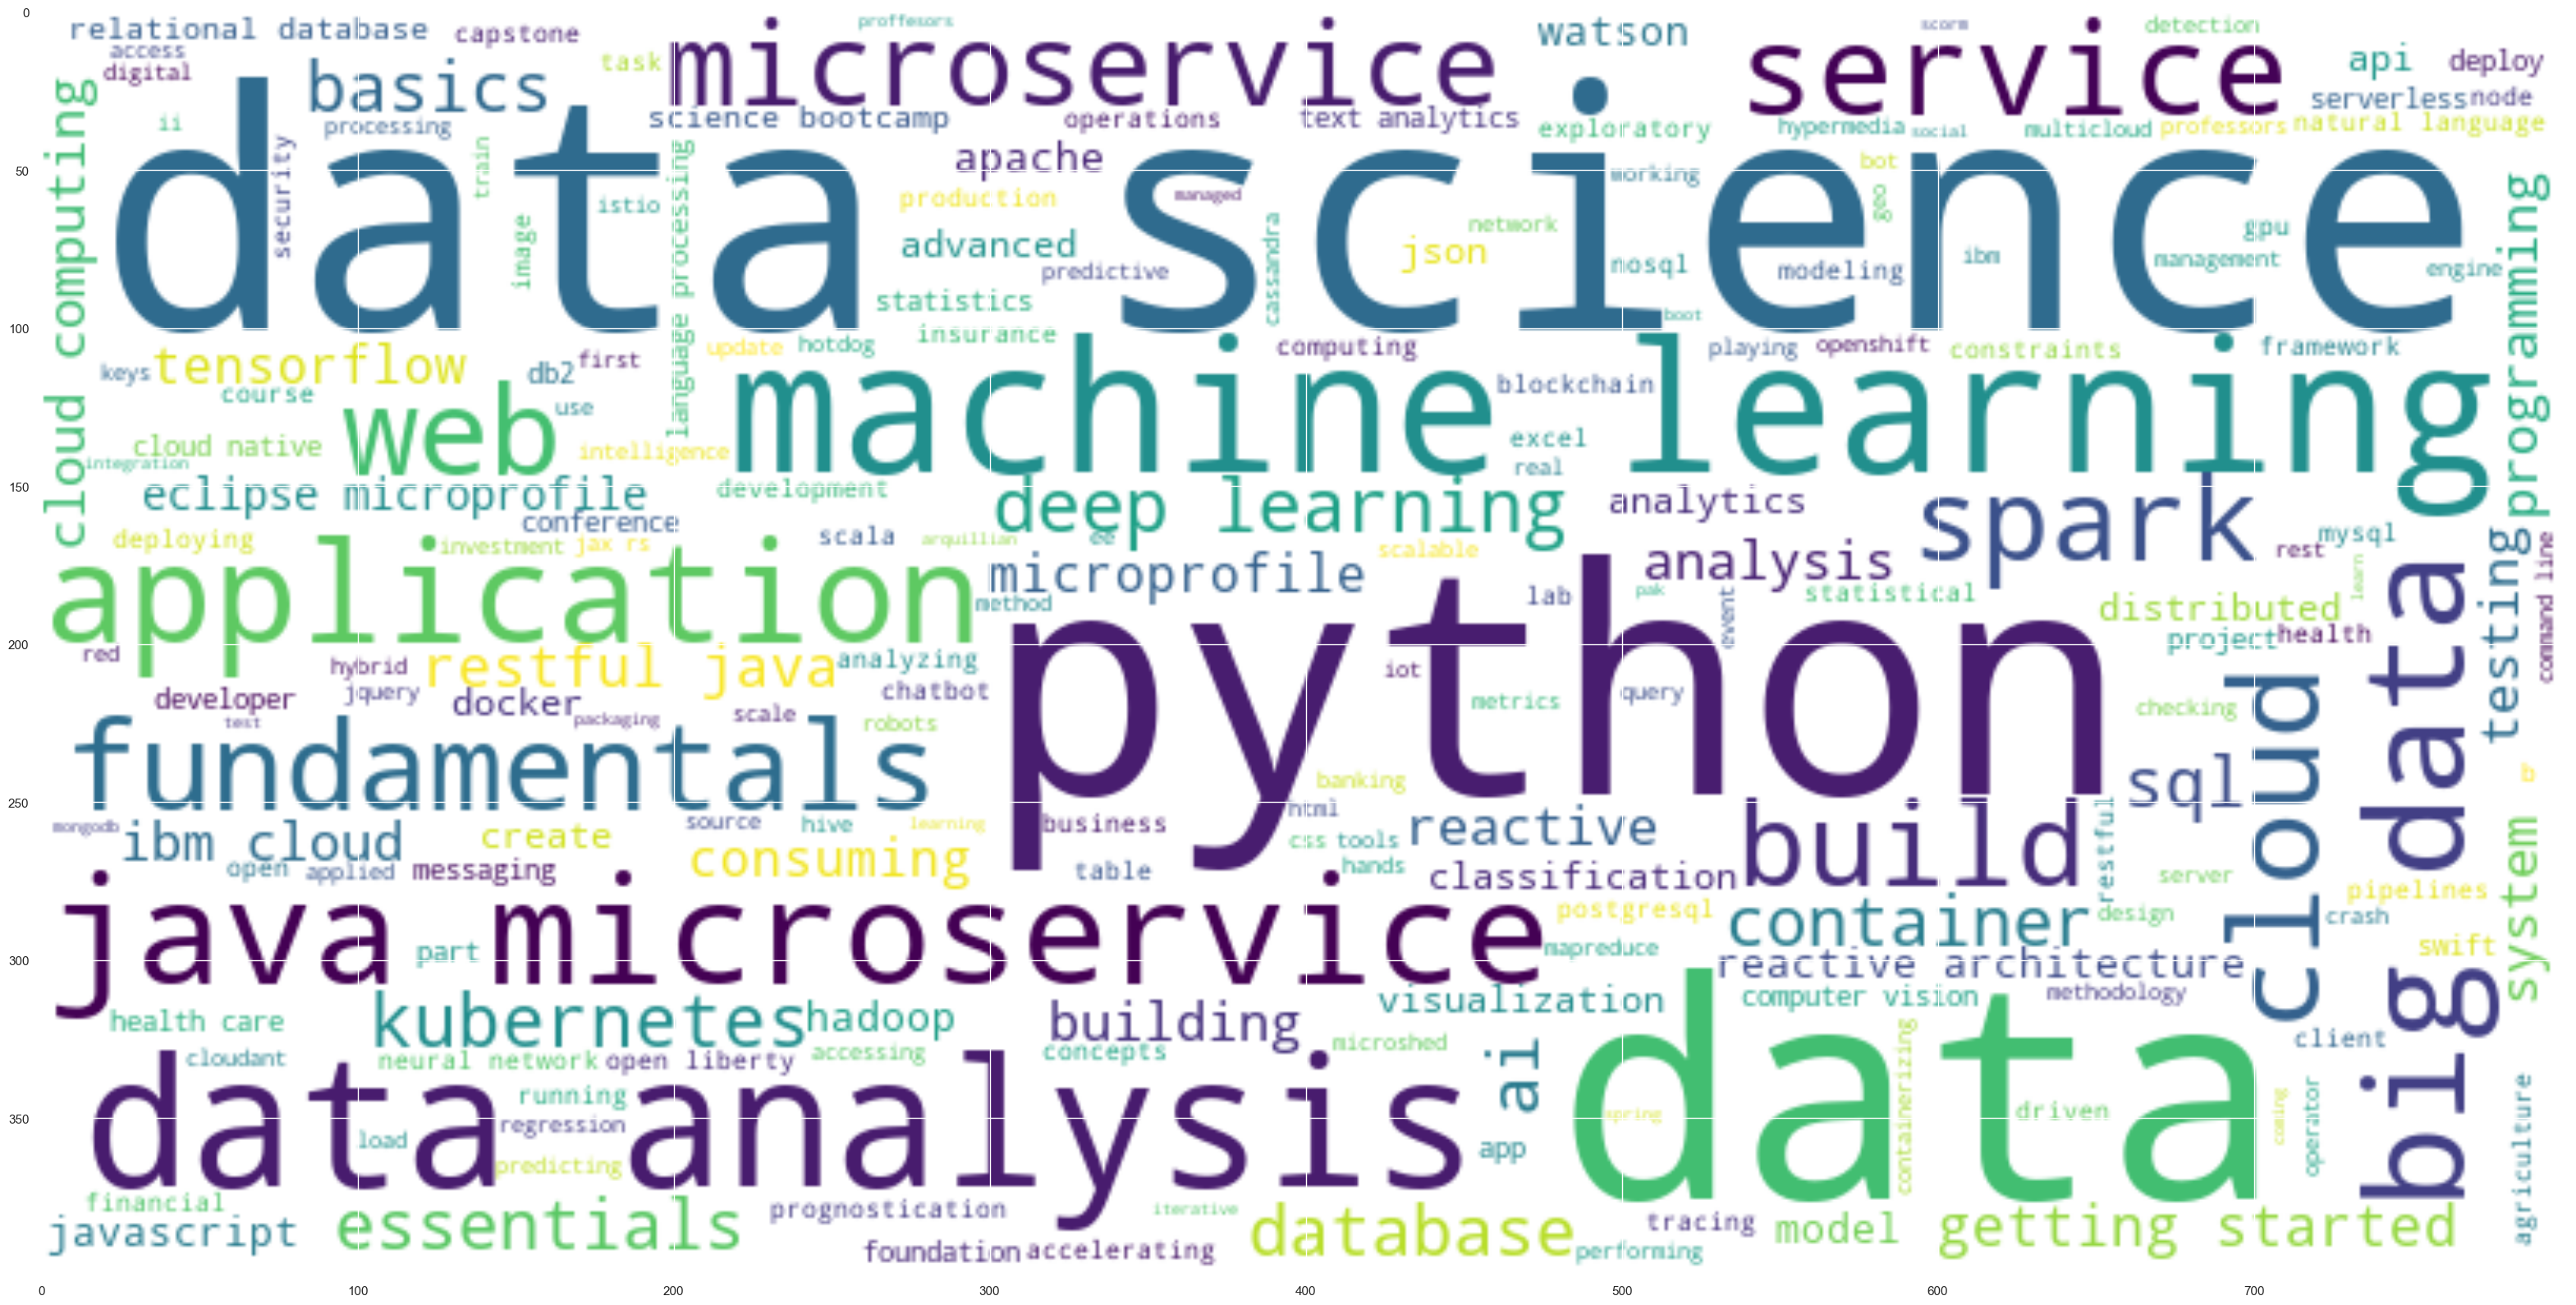

In [115]:
# Word cloud

#Plot a word cloud from course titles
titles = " ".join(title for title in course_genre_df['TITLE'].astype(str))
titles
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

# Then, we create a WordCloud object and generate wordcloud from the titles.
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
wordcloud.generate(titles)
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()